<a href="https://colab.research.google.com/github/Crackshaq/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

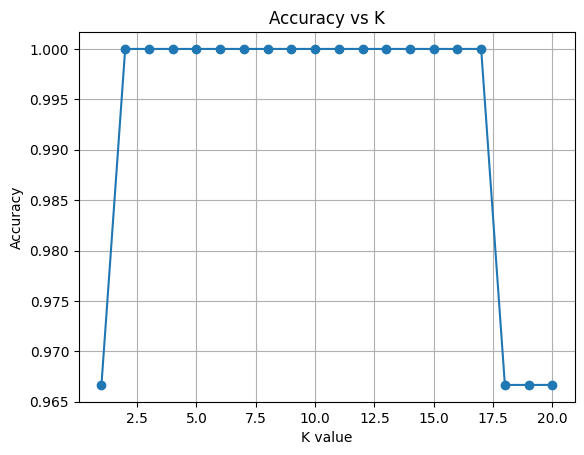

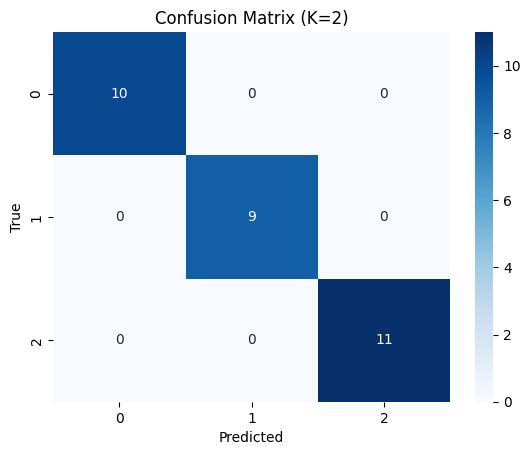

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


df = pd.read_csv('Iris.csv')
X = df.iloc[:, 1:-1]
y = df['Species']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


accuracies = []
k_values = list(range(1, 21))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.grid()
plt.show()


best_k = k_values[accuracies.index(max(accuracies))]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f'Confusion Matrix (K={best_k})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
